# Andrew Podhorecki
## Wk 16 12/8/2020
### Python Data Cleaning and Visualization Project - Python Stock Market Project

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# upload data from CSV fie

data = pd.read_csv('AMZN.csv')

In [3]:
# DATA INFO

data.head(10) #shows first 10 lines

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [4]:
data.tail(10) #shows last 10 lines

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
2232,11/13/2020,yahoo,3122.000000,3141.719971,3085.389893,3128.810059,3128.810059,3756200,amazon
2233,11/16/2020,yahoo,3093.199951,3142.699951,3072.689941,3131.060059,3131.060059,3808700,amazon
2234,11/17/2020,yahoo,3183.540039,3189.250000,3135.260010,3135.659912,3135.659912,3444700,amazon
2235,11/18/2020,yahoo,3134.000000,3140.000000,3105.100098,3105.459961,3105.459961,2916800,amazon
2236,11/19/2020,yahoo,3105.310059,3125.000000,3080.919922,3117.020020,3117.020020,3010300,amazon
2237,11/20/2020,yahoo,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,amazon
2238,11/23/2020,yahoo,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,amazon
2239,11/24/2020,yahoo,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,amazon
2240,11/25/2020,yahoo,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,amazon
2241,11/27/2020,yahoo,3211.260010,3216.189941,3190.050049,3195.340088,3195.340088,2392900,amazon


In [5]:
data.describe() # gives column statistics

,Open,High,Low,Close,Adj Close,Volume
count,2241.000000,2240.000000,2242.000000,2239.000000,2241.000000,2.242000e+03
mean,991.401419,1002.190218,979.221717,991.895355,991.190696,4.118187e+06
std,802.269032,811.968123,790.843600,801.664757,801.654109,2.278888e+06
min,173.809998,178.250000,172.000000,175.929993,175.929993,0.000000e+00
25%,320.359985,323.687500,315.807487,321.385010,320.510010,2.688550e+06
50%,717.380005,723.394989,712.629975,719.299988,719.070007,3.528700e+06
75%,1660.000000,1679.964966,1633.707459,1661.830017,1660.510010,4.839800e+06
max,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,2.385610e+07


In [6]:
data.info() # shows data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2242 non-null   object 
 1   Source     2242 non-null   object 
 2   Open       2241 non-null   float64
 3   High       2240 non-null   float64
 4   Low        2242 non-null   float64
 5   Close      2239 non-null   float64
 6   Adj Close  2241 non-null   float64
 7   Volume     2242 non-null   int64  
 8   Stock      2242 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 157.8+ KB


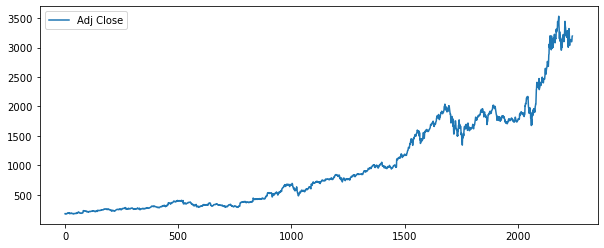

In [7]:
data['Adj Close'].plot(legend=True, figsize=(10,4)) #legend true shows label names

In [8]:
data.columns

Index(['Date', 'Source', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Stock'],
      dtype='object')

In [9]:
len(data.columns) #shows how many columns

9

In [10]:
#count the number of numerical and non-numerical variables (columns)

from pandas.api.types import is_numeric_dtype #checks data type

n = 0

for c in data.columns:
    if is_numeric_dtype(data[c]):
        n+=1
        
print('numerical variables: ', n, 'non-numerical variables: ', len(data.columns)-n)

numerical variables:  6 non-numerical variables:  3


In [11]:
# find number of missing values in each row
# DATA CLEANING to prep for anal

data.isnull().sum()

Date         0
Source       0
Open         1
High         2
Low          0
Close        3
Adj Close    1
Volume       0
Stock        0
dtype: int64

In [12]:
data.isnull() #shos first and last 5 rows

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2237,False,False,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False
2239,False,False,False,False,False,False,False,False,False
2240,False,False,False,False,False,False,False,False,False


In [13]:
# HANDLING MISSING DATA

#dropped all nulls
data.dropna(inplace=True)# inplace actually aplies the changes if True

In [14]:
data.isnull().sum()

Date         0
Source       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2241
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2235 non-null   object 
 1   Source     2235 non-null   object 
 2   Open       2235 non-null   float64
 3   High       2235 non-null   float64
 4   Low        2235 non-null   float64
 5   Close      2235 non-null   float64
 6   Adj Close  2235 non-null   float64
 7   Volume     2235 non-null   int64  
 8   Stock      2235 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 174.6+ KB


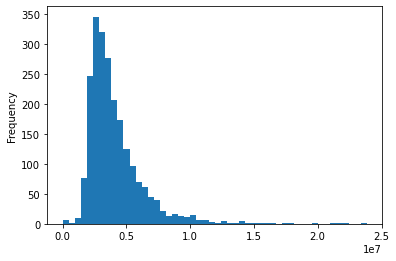

In [16]:
#plot data

data['Volume'].plot(kind='hist', bins=50)

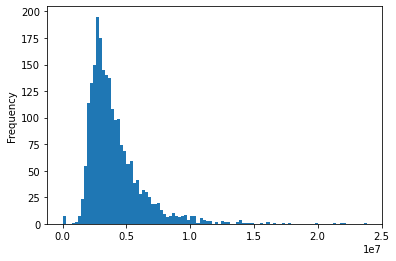

In [17]:
# clean abnormal vales

data['Volume'].plot(kind='hist', bins=100)

In [18]:
data['Volume'].min()

0

In [19]:
# stock market does not open with 0 stocks, unrealistic

In [20]:
data['Volume'].max()

23856100

In [21]:
data['Volume'].sort_values(ascending=True).head(20)

29            0
114           1
18            5
161           6
47           23
90           25
66           78
2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
Name: Volume, dtype: int64

In [22]:
#
#
# WK 16
#
#

In [23]:
# drop those weird values (remove volumes extreme low values <100,000)

data =data[data['Volume']>100000] #filter rows

data.shape

(2228, 9)

In [24]:
data['Volume'].sort_values(ascending=True).head(20)

2007     881300
245      984400
1001    1091200
126     1331700
879     1343400
426     1350600
376     1373000
497     1380400
405     1415000
411     1422600
415     1457100
1164    1458800
403     1504500
749     1513800
1167    1524100
151     1534300
417     1534700
152     1548100
1160    1563300
416     1566400
Name: Volume, dtype: int64

In [25]:
# remove all colums that have a constant/ single value

data.head(20) #thus can remove source and stock (as all from yahoo about AMZN)

,Date,Source,Open,High,Low,Close,Adj Close,Volume,Stock
0,1/3/2012,yahoo,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,amazon
1,1/4/2012,yahoo,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,amazon
2,1/5/2012,yahoo,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,amazon
3,1/6/2012,yahoo,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,amazon
4,1/9/2012,yahoo,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,amazon
5,1/10/2012,yahoo,181.100006,182.399994,177.100006,179.339996,179.339996,3985800,amazon
6,1/11/2012,yahoo,179.639999,180.770004,178.190002,178.899994,178.899994,3102700,amazon
7,1/12/2012,yahoo,179.419998,179.490005,175.750000,175.929993,175.929993,5385800,amazon
8,1/13/2012,yahoo,175.809998,178.800003,173.500000,178.419998,178.419998,4753500,amazon
9,1/17/2012,yahoo,180.149994,183.300003,178.509995,181.660004,181.660004,5644500,amazon


In [26]:
# will check/ find data for repeating values and add to list of columns we want to remove

constant_columns=[]

for column in data.columns:
    n = len(data[column].unique())
    if n ==1:
        constant_columns.append(column)
        

print('Constant Columns: ', constant_columns)

Constant Columns:  ['Source', 'Stock']


In [27]:
# now can drop constant columns

data.drop(columns=constant_columns, axis=1, inplace=True)

data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900
...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400


In [28]:
# Adding Year, Month, Day columns to the data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.2+ KB


In [30]:
dateObject = pd.DatetimeIndex(data['Date'])

In [31]:
dateObject #converted to actual date info, as array

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18',
               '2020-11-19', '2020-11-20', '2020-11-23', '2020-11-24',
               '2020-11-25', '2020-11-27'],
              dtype='datetime64[ns]', name='Date', length=2228, freq=None)

In [33]:
data['Year'] = dateObject.year
data['Month'] = dateObject.month
data['Day'] = dateObject.day

data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110800,2012,1,3
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205200,2012,1,4
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809100,2012,1,5
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008400,2012,1,6
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056900,2012,1,9
...,...,...,...,...,...,...,...,...,...,...
2237,11/20/2020,3117.020020,3132.889893,3098.050049,3099.399902,3099.399902,3374400,2020,11,20
2238,11/23/2020,3116.699951,3139.750000,3065.459961,3098.389893,3098.389893,4708900,2020,11,23
2239,11/24/2020,3100.500000,3134.250000,3086.260010,3118.060059,3118.060059,3602100,2020,11,24
2240,11/25/2020,3141.870117,3198.000000,3140.260010,3185.070068,3185.070068,3790400,2020,11,25


In [34]:
data[['Date','Year','Month','Day']]

,Date,Year,Month,Day
0,1/3/2012,2012,1,3
1,1/4/2012,2012,1,4
2,1/5/2012,2012,1,5
3,1/6/2012,2012,1,6
4,1/9/2012,2012,1,9
...,...,...,...,...
2237,11/20/2020,2020,11,20
2238,11/23/2020,2020,11,23
2239,11/24/2020,2020,11,24
2240,11/25/2020,2020,11,25


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   int64  
 7   Year       2228 non-null   int64  
 8   Month      2228 non-null   int64  
 9   Day        2228 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 191.5+ KB


In [36]:
# Transform the valyes of Volume entries to represent thousands

data[['Volume']]=data[['Volume']]/1000

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1/3/2012,175.889999,179.479996,175.550003,179.029999,179.029999,5110.8,2012,1,3
1,1/4/2012,179.210007,180.500000,176.070007,177.509995,177.509995,4205.2,2012,1,4
2,1/5/2012,175.940002,178.250000,174.050003,177.610001,177.610001,3809.1,2012,1,5
3,1/6/2012,178.070007,184.649994,177.500000,182.610001,182.610001,7008.4,2012,1,6
4,1/9/2012,182.759995,184.369995,177.000000,178.559998,178.559998,5056.9,2012,1,9


### Use visualization for data analysis

In [37]:
# Show the trend of sum of Volume over years

data[['Year','Volume']].groupby('Year').sum()

,Volume
Year,
2012,975492.4
2013,747905.7
2014,1029066.7
2015,957102.0
2016,1038756.3
2017,882705.4
2018,1417897.6
2019,974729.4
2020,1166035.7


Text(0, 0.5, "Stock's Volume")

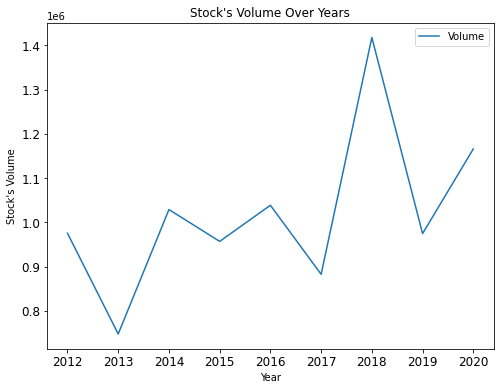

In [39]:
# plot the data

data[['Year','Volume']].groupby('Year').sum().plot(figsize=(8,6),y='Volume',fontsize=12,title="Stock's Volume Over Years")
plt.ylabel("Stock's Volume")

In [40]:
# show the trend of the stocks volume over months

data[['Month','Volume']].groupby('Month').sum()

,Volume
Month,
1,884620.5
2,846030.2
3,839584.5
4,890804.0
5,693382.7
6,671267.7
7,792035.2
8,633655.4
9,650017.7


Text(0, 0.5, "Stock's Volume")

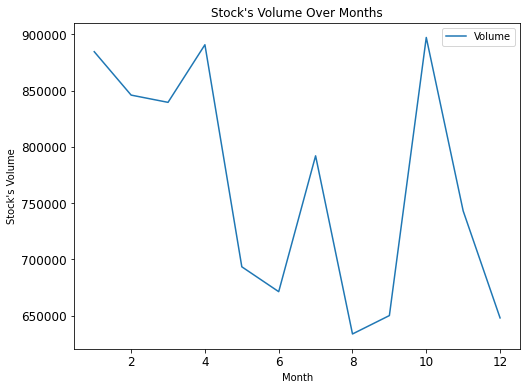

In [41]:
data[['Month','Volume']].groupby('Month').sum().plot(figsize=(8,6),y='Volume',fontsize=12,title="Stock's Volume Over Months")
plt.ylabel("Stock's Volume")

Text(0, 0.5, "Stock's Volume")

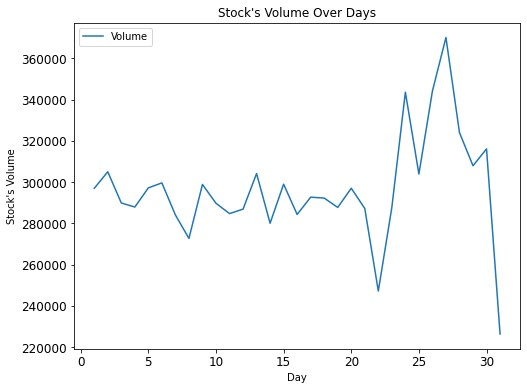

In [42]:
# for days

data[['Day','Volume']].groupby('Day').sum().plot(figsize=(8,6),y='Volume',fontsize=12,title="Stock's Volume Over Days")
plt.ylabel("Stock's Volume")

Text(0, 0.5, "Stock's Volume")

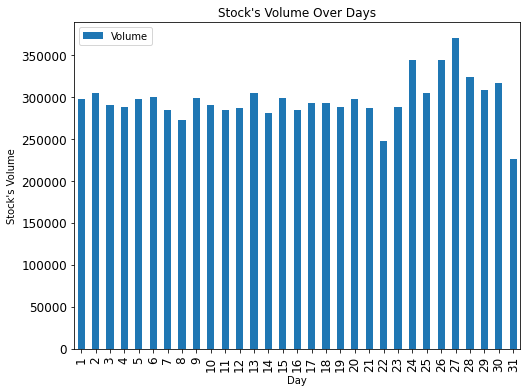

In [44]:
data[['Day','Volume']].groupby('Day').sum().plot.bar(figsize=(8,6),y='Volume',fontsize=12,title="Stock's Volume Over Days")
plt.ylabel("Stock's Volume")

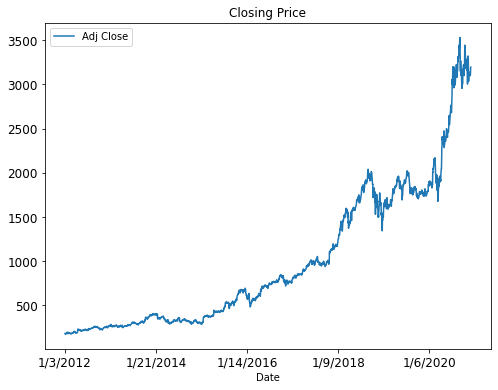

In [49]:
# show the average of closing per date

data[['Date', 'Adj Close']].plot(figsize=(8,6),x='Date',y='Adj Close',fontsize=12,title="Closing Price")

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2228 non-null   object 
 1   Open       2228 non-null   float64
 2   High       2228 non-null   float64
 3   Low        2228 non-null   float64
 4   Close      2228 non-null   float64
 5   Adj Close  2228 non-null   float64
 6   Volume     2228 non-null   float64
 7   Year       2228 non-null   int64  
 8   Month      2228 non-null   int64  
 9   Day        2228 non-null   int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 191.5+ KB


In [50]:
# another way that converted date object to Datetime object

data['Date'] = pd.to_datetime(data['Date'],format='%m/%d/%Y')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2228 entries, 0 to 2241
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2228 non-null   datetime64[ns]
 1   Open       2228 non-null   float64       
 2   High       2228 non-null   float64       
 3   Low        2228 non-null   float64       
 4   Close      2228 non-null   float64       
 5   Adj Close  2228 non-null   float64       
 6   Volume     2228 non-null   float64       
 7   Year       2228 non-null   int64         
 8   Month      2228 non-null   int64         
 9   Day        2228 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 191.5 KB


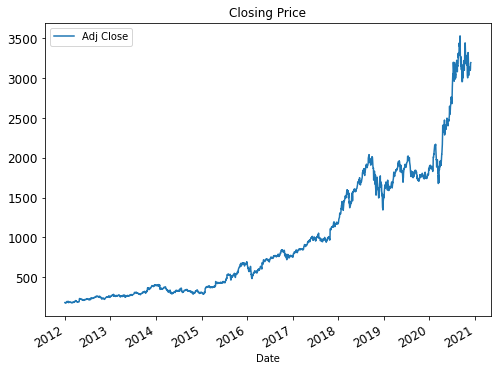

In [52]:
data[['Date', 'Adj Close']].plot(figsize=(8,6),x='Date',y='Adj Close',fontsize=12,title="Closing Price")

Text(0, 0.5, 'Sum of Adj Close')

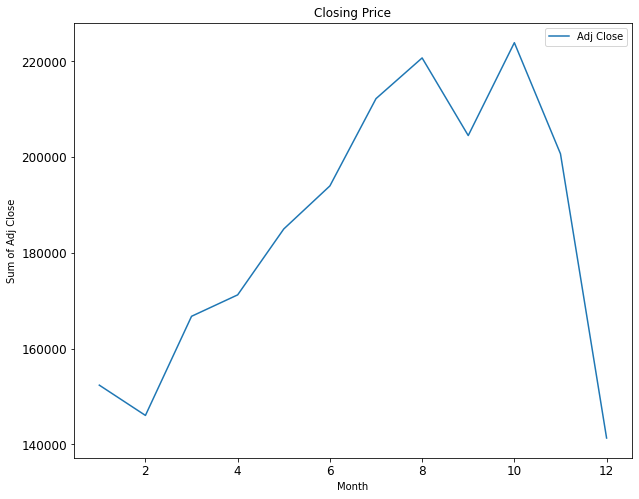

In [53]:
#show closing price over months
# can group as months are repaeating (not unique)

data[['Month', 'Adj Close']].groupby('Month').sum().plot(figsize=(10,8),y='Adj Close',fontsize=12,title="Closing Price")

plt.ylabel('Sum of Adj Close')

Text(0, 0.5, 'Mean of Adj Close')

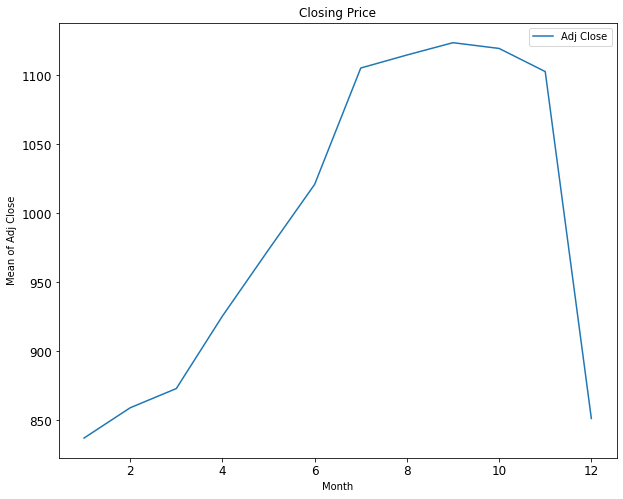

In [56]:
# show the average of the closing price over months

data[['Month', 'Adj Close']].groupby('Month').mean().plot(figsize=(10,8),y='Adj Close',fontsize=12,title="Closing Price")

plt.ylabel('Mean of Adj Close')